PROJECT ID :: #CC69856

**PREDICTION OF** **EMPLOYEE** **ATTRITION**

IMPORT LIBRARIES

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns



LOAD AND EXPLORE DATA

In [32]:
# Load the dataset
df = pd.read_csv('/HR-Analytics.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

DATA PRE PROCESSING

Handling Missing Values and Dropping Irrelevant Columns

In [34]:
# Drop unnecessary columns
df = df.drop(columns=['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'])

# Handle missing values
df = df.dropna()


KeyError: "['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'] not found in axis"

Encoding Categorical Variables

In [23]:
# Convert categorical variables to numeric using LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

# Convert other categorical variables using get_dummies
df = pd.get_dummies(df, drop_first=True)


Feature and Target Variables

In [24]:
# Define feature variables (X) and target variable (y)
X = df.drop(columns=['Attrition'])
y = df['Attrition']


Train-Test Split and Standardization

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


MODEL TRAINING

In [26]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the model with the best parameters
best_model = grid_search.best_estimator_



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


MODEL EVALUTION

In [27]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Display the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.2f}')



Accuracy: 0.88
Confusion Matrix:
[[254   1]
 [ 35   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

ROC AUC Score: 0.55


ROC CURVE

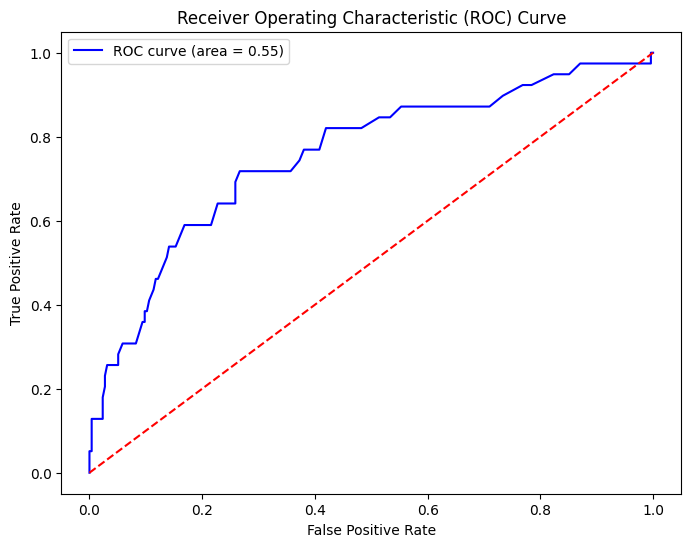

In [28]:
# Plot ROC curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


FEATURE IMPORTANCE

Feature Importance:
MonthlyIncome                        0.076360
OverTime_Yes                         0.061120
Age                                  0.056733
DailyRate                            0.049314
MonthlyRate                          0.048114
TotalWorkingYears                    0.047499
YearsAtCompany                       0.043406
HourlyRate                           0.042441
DistanceFromHome                     0.041938
NumCompaniesWorked                   0.036352
StockOptionLevel                     0.034131
PercentSalaryHike                    0.033669
YearsWithCurrManager                 0.031534
JobSatisfaction                      0.028084
YearsSinceLastPromotion              0.027541
YearsInCurrentRole                   0.027507
EnvironmentSatisfaction              0.027036
TrainingTimesLastYear                0.025483
JobLevel                             0.023613
WorkLifeBalance                      0.022414
JobInvolvement                       0.021569
RelationshipSa

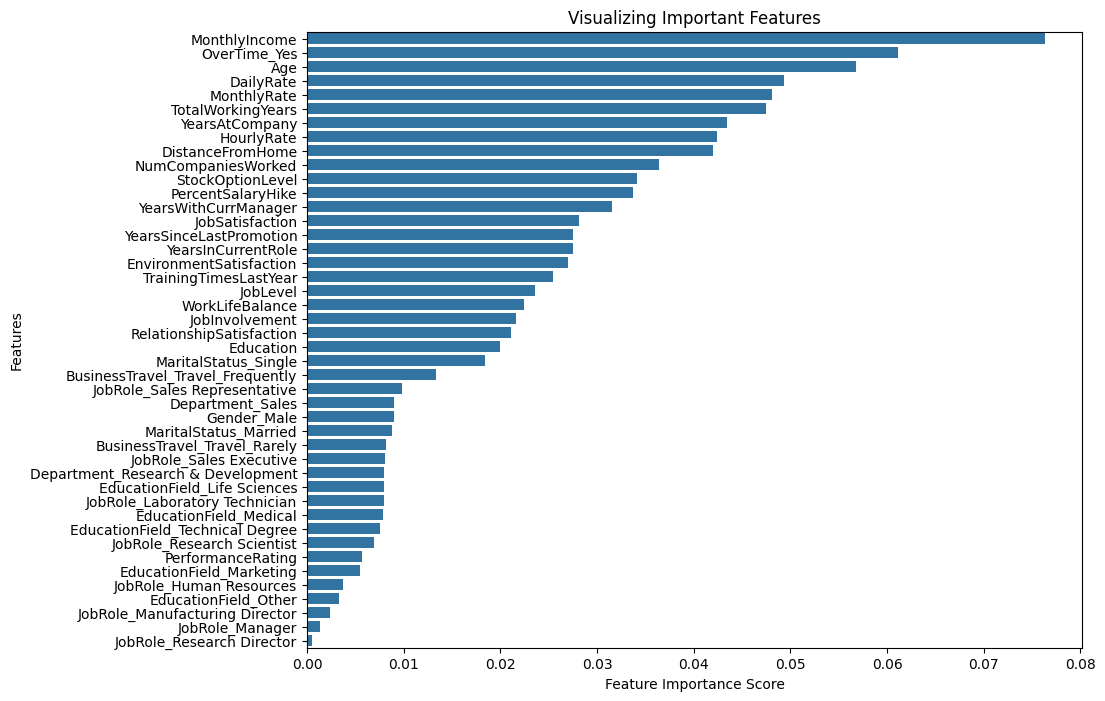

In [29]:
# Get feature importance
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display feature importance
print('Feature Importance:')
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()


CROSS VALIDATION

In [30]:
# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5)

# Display cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean():.2f}')


Cross-Validation Scores: [0.84693878 0.86054422 0.86734694 0.8537415  0.85714286]
Mean CV Score: 0.86
